In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [13]:
df = pd.read_csv("Churn_Modelling.csv")

In [15]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8437,8438,15591428,Myers,781,France,Male,29,9,0.00,2,0,0,172097.40,0
4264,4265,15761294,Manna,667,Germany,Female,56,8,137464.04,1,1,0,130846.79,1
449,450,15658169,Cook,778,Spain,Female,47,6,127299.34,2,1,0,124694.99,0
3982,3983,15627665,Sung,614,France,Male,46,4,0.00,1,1,0,74379.57,1
7285,7286,15725028,Chialuka,679,France,Male,29,3,0.00,2,1,1,63687.06,0


In [17]:
df = df.drop(columns =["Surname"],axis = 1)

In [19]:
df.sample(5)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7614,7615,15725002,749,France,Male,37,7,0.00,2,1,0,20306.79,0
5474,5475,15696277,651,France,Female,34,9,0.00,2,1,0,138113.71,0
9689,9690,15728005,698,France,Female,57,9,111359.55,2,1,0,105715.01,0
5668,5669,15720919,667,France,Male,42,7,0.00,1,0,1,108348.94,1
9708,9709,15604515,737,Germany,Female,22,10,111543.26,2,0,0,106327.85,0


In [21]:
df.Geography.unique

<bound method Series.unique of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>

In [23]:
for col in df:
    print(f'{col} : {df[col].unique()}')

RowNumber : [    1     2     3 ...  9998  9999 10000]
CustomerId : [15634602 15647311 15619304 ... 15584532 15682355 15628319]
CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429

In [25]:
df.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [27]:
for col in df:
    if col == "Gender":
        df.replace({"Female" : 0,"Male":1},inplace = True)

C:\Users\Laraib\AppData\Local\Temp\ipykernel_12212\3025077102.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Female" : 0,"Male":1},inplace = True)


In [29]:
df.sample(8)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8564,8565,15584704,519,France,1,48,10,71083.98,1,1,0,137959.00,0
858,859,15686137,456,Spain,1,32,9,147506.25,1,1,1,135399.21,0
865,866,15686983,678,Germany,0,25,10,76968.12,2,0,1,131501.72,0
5568,5569,15594270,693,France,1,38,7,198338.77,2,1,1,14278.18,0
9983,9984,15656710,613,France,1,40,4,0.00,1,0,0,151325.24,0
2591,2592,15790846,634,Germany,1,38,2,148430.55,1,1,1,56055.72,0
4926,4927,15762927,674,Germany,0,36,6,100762.64,1,1,0,182156.86,0
1338,1339,15612108,625,France,1,52,5,164978.01,1,1,1,67788.49,0


In [31]:
df = df.drop(columns = ["RowNumber","CustomerId"])

In [33]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7577,615,Germany,1,43,3,86920.86,1,1,1,150048.37,0
9631,526,France,0,37,5,53573.18,1,1,0,62830.97,0
9640,750,France,0,35,3,0.00,1,1,0,191520.50,0
8263,555,Spain,1,32,10,0.00,2,0,1,168605.96,0
8616,653,Spain,0,27,6,107751.68,2,1,1,33389.42,0
6326,555,France,1,31,8,145875.74,1,1,0,137491.23,0
7421,634,Spain,0,36,1,0.00,1,1,1,143960.72,0
4520,652,Germany,1,46,10,121063.80,3,1,0,151481.86,1
6253,395,Germany,0,34,5,106011.59,1,1,1,17376.57,1
5855,498,France,1,46,1,91857.66,1,1,0,101954.78,1


In [35]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [37]:
df = pd.get_dummies(df,columns = ["Geography"])

In [39]:
df.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1204,630,0,40,7,0.00,2,1,1,34453.17,0,True,False,False
8533,706,1,34,8,0.00,2,1,1,37479.97,0,True,False,False
1123,779,1,33,1,158456.76,1,1,1,197000.92,1,False,True,False
4882,655,0,36,10,122314.39,1,1,0,9181.66,0,False,True,False
7583,682,1,26,8,0.00,2,1,0,178373.43,0,True,False,False
998,811,0,28,4,167738.82,2,1,1,9903.42,0,False,True,False
9142,494,0,35,9,112727.06,2,1,0,183752.91,0,True,False,False
94,730,1,42,4,0.00,2,0,1,85982.47,0,False,False,True
6679,470,1,30,4,125385.01,1,1,0,68293.93,0,False,False,True
9605,736,0,29,9,0.00,2,0,0,176152.70,0,True,False,False


In [41]:
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(np.int8)

In [43]:
df.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6034,655,1,37,8,163708.58,2,0,0,76259.23,0,0,0,1
962,642,1,32,7,100433.80,1,1,1,39768.59,0,0,0,1
8140,605,0,36,6,0.00,1,0,1,690.84,0,1,0,0
3406,632,0,29,7,80922.75,1,1,0,7820.78,0,0,0,1
7774,850,1,43,5,129305.09,2,0,1,19244.58,0,0,1,0
3067,806,1,31,10,138653.51,1,1,0,190803.37,0,0,1,0
1359,431,1,37,0,120764.08,1,1,1,117023.08,0,1,0,0
2602,594,1,28,0,142574.71,2,1,0,129084.82,0,0,1,0
7443,634,0,24,2,87413.19,1,1,0,63340.65,0,1,0,0
2084,423,0,36,5,97665.61,1,1,0,118372.55,1,1,0,0


In [45]:
df[df.Balance == 0.00].shape

(3617, 13)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
cols_to_scale = ["Age","Balance","Tenure","EstimatedSalary","CreditScore"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [49]:
df.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5573,0.662,1,0.148649,0.8,0.000000,1,1,0,0.331810,0,1,0,0
2524,0.864,1,0.459459,0.4,0.000000,1,1,1,0.263766,1,0,0,1
8053,0.672,1,0.148649,0.3,0.738862,1,1,0,0.323368,0,0,1,0
1984,0.362,0,0.364865,0.1,0.504171,2,1,1,0.823728,0,0,0,1
5087,0.780,1,0.337838,0.9,0.000000,1,1,0,0.996491,1,0,0,1
3724,0.844,0,0.445946,0.9,0.573663,1,0,1,0.233342,1,0,1,0
7458,0.756,0,0.337838,0.5,0.000000,1,1,1,0.600440,0,0,0,1
4293,0.766,1,0.351351,0.3,0.422765,1,0,1,0.508078,0,0,0,1
8804,0.830,1,0.310811,0.2,0.000000,2,0,1,0.956111,0,1,0,0
1835,0.692,1,0.270270,0.6,0.567227,1,1,1,0.040038,0,0,1,0


In [50]:
y = df.Exited
y.shape

(10000,)

In [51]:
X = df.drop(columns = ["Exited"],axis = 1)
X.shape

(10000, 12)

In [52]:
import tensorflow as tf
from tensorflow import keras

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,random_state = 5)

In [55]:
print (X_train.shape ,  X_test.shape,X_train.shape[1])

(8000, 12) (2000, 12) 12


In [56]:
df.shape

(10000, 13)

In [57]:
print(y_train.shape,y_test.shape)

(8000,) (2000,)


In [63]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(24, activation='relu', input_shape=(12,)),  # First hidden layer
    keras.layers.Dense(64, activation='relu'),                       # Second hidden layer
    keras.layers.Dense(1, activation='sigmoid')                      # Output layer for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


C:\Users\Laraib\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7393 - loss: 0.5393
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8079 - loss: 0.4497
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8132 - loss: 0.4287
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8239 - loss: 0.4023
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8274 - loss: 0.3894
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8399 - loss: 0.3775
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8448 - loss: 0.3638
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8396 - loss: 0.3711
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8505 - loss: 0.3616
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8504 - loss: 0.3575
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8560 - loss: 0.3439
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [65]:
yp = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [66]:
y_test[0:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [67]:
y_pred = []
for elements in yp:
    if elements>0.5:
        y_pred.append(1)

    else:
        y_pred.append(0)
    

In [68]:
y_pred[0:20]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [69]:
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1595
           1       0.62      0.52      0.57       405

    accuracy                           0.84      2000
   macro avg       0.75      0.72      0.74      2000
weighted avg       0.83      0.84      0.83      2000



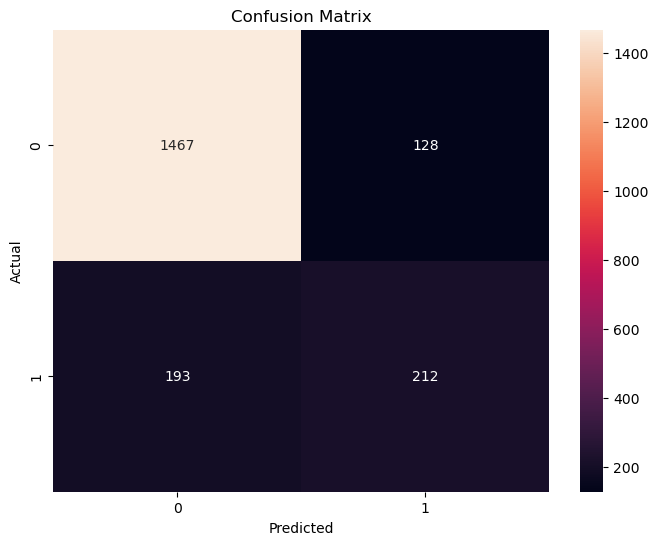

In [71]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [92]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model = keras.Sequential(
        [
            keras.layers.Dense(20,input_dim = 26,0,activation = 'relu'),
            keras.layers.Dense(15,activation = 'relu'),
            keras.layers.Dense(1,activation = 'sigmoid'),
        ])
    model.compile(optimizer = 'adam',loss = loss, metrics = ['accuracy'])
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test,y_test))
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds    

In [94]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


C:\Users\Laraib\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 26, but received input with shape (32, 12)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 12), dtype=float32)
  • training=True
  • mask=None